In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 4-1 선형 모델

선형 모델은 통계 분석과 머신러닝에서 공통으로 사용되는 모델입니다.


- 통계 분석에서는 변수 간의 관계를 파악하여 현상을 설명하고 분석하기 위해 사용됩니다.


- 머신러닝에서는 예측과 분류 문제의 해결과 성능 향상에 중점을 둡니다.

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

간단한 선형 회귀 데이터셋을 만들어 보고, 

statsmodels 통계 라이브러리에서 제공하는 기능과

sklearn 머신러닝 라이브러리에서 제공하는 기능의 특징을 살펴봅니다.

</div>

$y = X + 5 + e, e \sim N(0, 1)$
    
관계를 지닌 데이터 포인트 100개를 만듭니다.

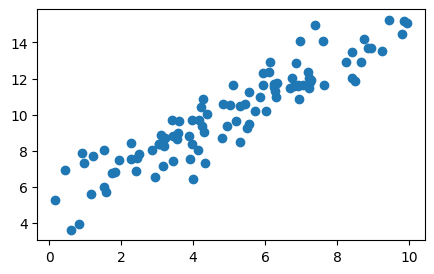

In [2]:
a, b = 1, 5
np.random.seed(123) # 모든 경우에 대해 동일한 데이터셋이 되도록 랜덤 시드를 설정합니다.
X = np.random.random(size=100) * 10
y = X * a + b + np.random.normal(size=100)

plt.figure(figsize=(5, 3))
plt.scatter(X, y)
plt.show()

In [3]:
from statsmodels.api import OLS, add_constant
# statsmodels.
lm = OLS(y, add_constant(X)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     583.8
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           4.57e-43
Time:                        18:50:37   Log-Likelihood:                -139.70
No. Observations:                 100   AIC:                             283.4
Df Residuals:                      98   BIC:                             288.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1699      0.225     22.994      0.000       4.724       5.616
x1             0.9731      0.040     24.161      0.000       0.893       1.053
==============================================================================
Omnibus:                        0.322   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.099
Skew:                          -0.067   Prob(JB):                        0.951
Kurtosis:                       3.078   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

reg_lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(X, axis=-1), y, train_size=0.8, random_state=123)
reg_lr.fit(X_train, y_train)
mean_squared_error(y_test, reg_lr.predict(X_test))

1.2583850943570871

## 0. 데이터셋 소개

### Abalone

[Abalone](https://archive.ics.uci.edu/dataset/1/abalone) 데이터셋: 전복의 생육 정보 데이터입니다.


|Name|Data Type|	Meas.|	Description|
|----|---------|-----|-----------|
|Sex|nominal||M, F, and I (infant)|
|Length|continuous|mm|Longest shell measurement|
|Diameter|continuous|mm|perpendicular to length|
|Height|continuous|mm|with meat in shell|
|Whole|continuous|grams|whole abalone|
|Shucked|continuous|grams|weight of meat|
|Viscera|continuous|grams|gut weight (after bleeding)|
|Shell|continuous|grams|after being dried|
|Rings|integer||+1.5 gives the age in years|

분류와 회귀 문제 모두를 다루어 볼 수 있는 데이터셋입니다.

In [5]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df_berry = pd.read_csv('data/wild_blueberry.csv', index_col='Row#')
df_berry.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


## 1. 선형 회귀 모델


### 학습 방법

1. 일반 최소 제곱법(Ordinary Least Square)

<div style="border: 0px; padding: 12px; margin-top: 10px; margin-left: 20px;">

정규 방정식을 이용하여 계수를 구합니다. 

$\hat{\beta} = (X^TX)^{-1}X^Ty$ 

$X^TX$ 그람 행렬의 역행렬을 구해야 하므로 변수의 개수가 많아질 수록 학습 시간이 오래 걸립니다. 
    
</div>

**sklearn.linear_model.LinearRegression**

**주요 하이퍼 파라메터**

|하이퍼 파라메터|설명|
|----:|:----|
|fit_intercept|절편 사용여부|



2. 경사하강법(Gradient Descent)

**sklearn.linear_model.SGDRegressor**

- 주요 하이퍼 파라메터

|하이퍼 파라메터|설명|
|----:|:----|
|max_iter|경사하강법에서 데이터 학습 반복수,Epoch|
|shuffle|학습시 데이터셋 섞음 여부|
|learning_rate|학습율, 'contant', 'optimal', 'invscaling', 'adaptive'|
|alpha|규제 계수|
|eta0|초기 학습율|
|early_stopping|조기 종료 여부|
|validation_fraction|조기 종료를 판단하기 위한 성능 측정셋의 비율|
|n_iter_no_change|조기 종료를 판단시 성능 변화가 없는 반복수|


In [7]:
from sklearn.linear_model import SGDRegressor

reg_sgd_lr = SGDRegressor(
    alpha=0, # LinearRegression의 규제 계수는 0 입니다. 동일한 조건으로 학습되도록, 규제 계수를 0으로 설정합니다.
    random_state=123, # 매 수행시 동일한 결과가 나오도록 랜럼 시드를 설정합니다.
    shuffle=True, # 데이터가 편중되었을 경우를 대비하여 고루 섞이도록 설정합니다.
    early_stopping=False # 조기 종료 루틴은 사용하지 않습니다.
)
reg_sgd_lr.fit(X_train, y_train)
mean_squared_error(y_test, reg_sgd_lr.predict(X_test))

1.1312637557062695

- 경사하강법을 통한 선형회귀모델의 안정적인 학습을 위해서는 입력 변수의 표준화 또는 정규화가 필요합니다.

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone으로 연령(Rings)를 대상변수로 하고 나머지 변수를 입력 변수로 하여 경사하강법으로 선형회귀 모델을 학습니다.

연속형 변수의 표준화 여부가 모델 학습에 어떤 영향을 미치는지 확인해봅니다.
    
</div>

In [8]:
# 입변 변수의 스케일 확인하기 위해 기술 통계량을 출력해봅니다.
X_cols = [i for i in df_abalone.columns if i not in ['Rings']]
df_abalone[X_cols].describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

X_cols = [i for i in df_abalone.columns if i not in ['Rings']]
cont_val = [i for i in df_abalone.columns if i not in ['Sex', 'Rings']]

ct = ColumnTransformer([
    ('std', 'passthrough', cont_val),
    ('ohe', OneHotEncoder(drop='first'), ['Sex']) # 성별은 범주형 변수이고 이를 첫번째 범주를 제외하여 가변수화합니다.
])

reg_sgd_lr = make_pipeline(ct, SGDRegressor(max_iter=100))
reg_sgd_lr.fit(df_abalone[X_cols], df_abalone['Rings'])
mean_squared_error(df_abalone['Rings'], reg_sgd_lr.predict(df_abalone[X_cols]))

c:\users\user\python3.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


5.313600916926954

In [10]:
ct = ColumnTransformer([
    ('std', StandardScaler(), cont_val), # 연속형 변수들을 표준화합니다.
    ('ohe', OneHotEncoder(drop='first'), ['Sex'])
])

reg_sgd_lr = make_pipeline(ct, SGDRegressor(max_iter=100))
reg_sgd_lr.fit(df_abalone[X_cols], df_abalone['Rings'])
mean_squared_error(df_abalone['Rings'], reg_sgd_lr.predict(df_abalone[X_cols]))

4.838092242471089

두 경우 모두 100번의 반복수를 주고 동일하게 설정했지만, 표준화를 하지 않았을 경우 100번 안에 수렴하지 못했다는 점에서,

효율적으로 동작하지 못함을 확인할 수 있습니다.

### 규제(Regularization)

회귀 계수의 절대 크기를 억제하는 방법입니다. Loss 함수에 규제를 더해줍니다.

1. L1 규제: 계수(Coefficent)에 절대값의 합. ($\alpha$: 규제 계수)

> L1 규제(L1 Regularization) = $\alpha\sum_{i=1}^n||\beta_i||_1$ = $\alpha\sum_{i=1}^n|\beta_i|$

2. L2 규제: 계수(Coefficent)에 제곱의 합. ($\alpha$: 규제 계수)

> L2 규제(L2 Regularization) = $\alpha\sum_{i=1}^n||\beta_i||_2^2$ = $\alpha\sum_{i=1}^n\beta_i^2$


손실(Loss) 함수에 규제를 포함해서 비용 함수(Cost Function)라고 합니다.

규제를 입력 변수에 해당하는 계수별로 균일하게 적용시키기 위해서는 표준화 또는 정규화가 필요합니다.

이를 수행하지 않는 다면, 스케일이 큰 변수는 규제를 상대적으로 적게 받게 되고 스케일이 작은 변수는 상대적으로 크게 받게 됩니다.

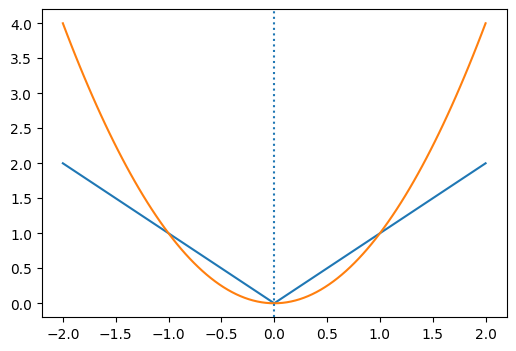

In [11]:
plt.figure(figsize=(6, 4))
x = np.linspace(-2, 2, 101)
plt.plot(x, np.abs(x))
plt.plot(x, np.square(x))
plt.axvline(0, linestyle='dotted')
plt.show()

L2 규제는 크기(Magnitude)가 1보다  크면 L1 보다 규제의 강도가 세지는 반면, 1보다 작으면 규제의 강도가 L1에 비해 작아 집니다.

L2 규제는 계수가 L1 규제에 비해 작아 질수록 급격하게 규제가 줄어 듭니다. L1 규제는 계수가 0이 되는 경우가 L2에 비해 빈번합니다.

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_cols = [i for i in df_abalone.columns if i not in ['Rings']]
cont_val = [i for i in df_abalone.columns if i not in ['Sex', 'Rings']]

ct = ColumnTransformer([
    ('std', StandardScaler(), cont_val),
    ('ohe', OneHotEncoder(drop='first'), ['Sex'])
])

X_ct_name = [i + '_std' for i in cont_val] + ['Sex_I', 'Sex_M']

df_train, df_test = train_test_split(df_abalone,  train_size=0.8, random_state=123)

In [13]:
df_train.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
2746,I,0.485,0.365,0.140,0.4475,0.1895,0.0925,0.2305,8
853,M,0.570,0.455,0.150,0.9520,0.3895,0.2155,0.2745,9
1809,F,0.640,0.475,0.140,1.0725,0.4895,0.2295,0.3100,8
3419,M,0.590,0.470,0.135,1.1685,0.5390,0.2790,0.2800,8
1199,F,0.720,0.580,0.195,2.1030,1.0265,0.4800,0.5375,10


**Ridge**

- L2 규제를 손실함수에 더한 선형 회귀 모델 입니다.

**sklearn.linear_model.Ridge**

> $L_{ridge}(y, \hat{y}) = \frac{1}{2n}||y - \hat{y}||^2_2 + \alpha ||\hat{\beta}||_2^2$

- 주요 하이퍼 파라메터

|하이퍼 파라메터|설명|
|----:|:----|
|alpha|규제 계수|

Ridge 회귀는 정규방정식으로도 도출할 수 있습니다.

> $S(\beta) = \sum_{i=1}^n\left(y_i - X_i\beta\right)^2 + \alpha\sum_{i=1}^k\beta_i^2= ||y - X\beta||^2 + \alpha\beta^T\beta$
> 
> $||y - X\beta||^2 + \alpha\beta^T\beta= (y - X\beta)^T(y - X\beta) + \alpha\beta^T\beta$
>
> $\frac{dS(\hat{\beta})}{d\hat{\beta}} = -X^Ty + X^TX\hat{\beta} + \alpha\hat{\beta}$
>
> $-X^Ty + X^TX\hat{\beta} + \alpha\hat{\beta}= 0$
>
> $\hat{\beta}=(X^TX + \alpha I)^{-1}X^Ty$, $I$:는 크기가 입력 변수의 수인 단위 행렬

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone에서 성별(Sex)을 사전 순으로 첫 번째 범주인'F'를 제외하고 가변수화 합니다.

80%는 학습 데이터 df_train으로, 20%는 평가 데이터 df_test로 나눕니다.

Ridge 모델의 규제 계수(alpha)에 따라 df_train과 df_test에 대한 평균제곱오차(Mean Squared Error)를 비교해 봅니다.

```
alphas = [1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
```

</div>

In [14]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
alphas = [1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
coefs, mse_train, mse_test = list(), list(), list()
for alpha in alphas:
    reg_rd = make_pipeline(ct, Ridge(alpha=alpha, random_state=123))
    reg_rd.fit(df_train[X_cols], df_train['Rings'])
    coefs.append(reg_rd[1].coef_)
    mse_train.append(mean_squared_error(df_train['Rings'], reg_rd.predict(df_train[X_cols])))
    mse_test.append(mean_squared_error(df_test['Rings'], reg_rd.predict(df_test[X_cols])))

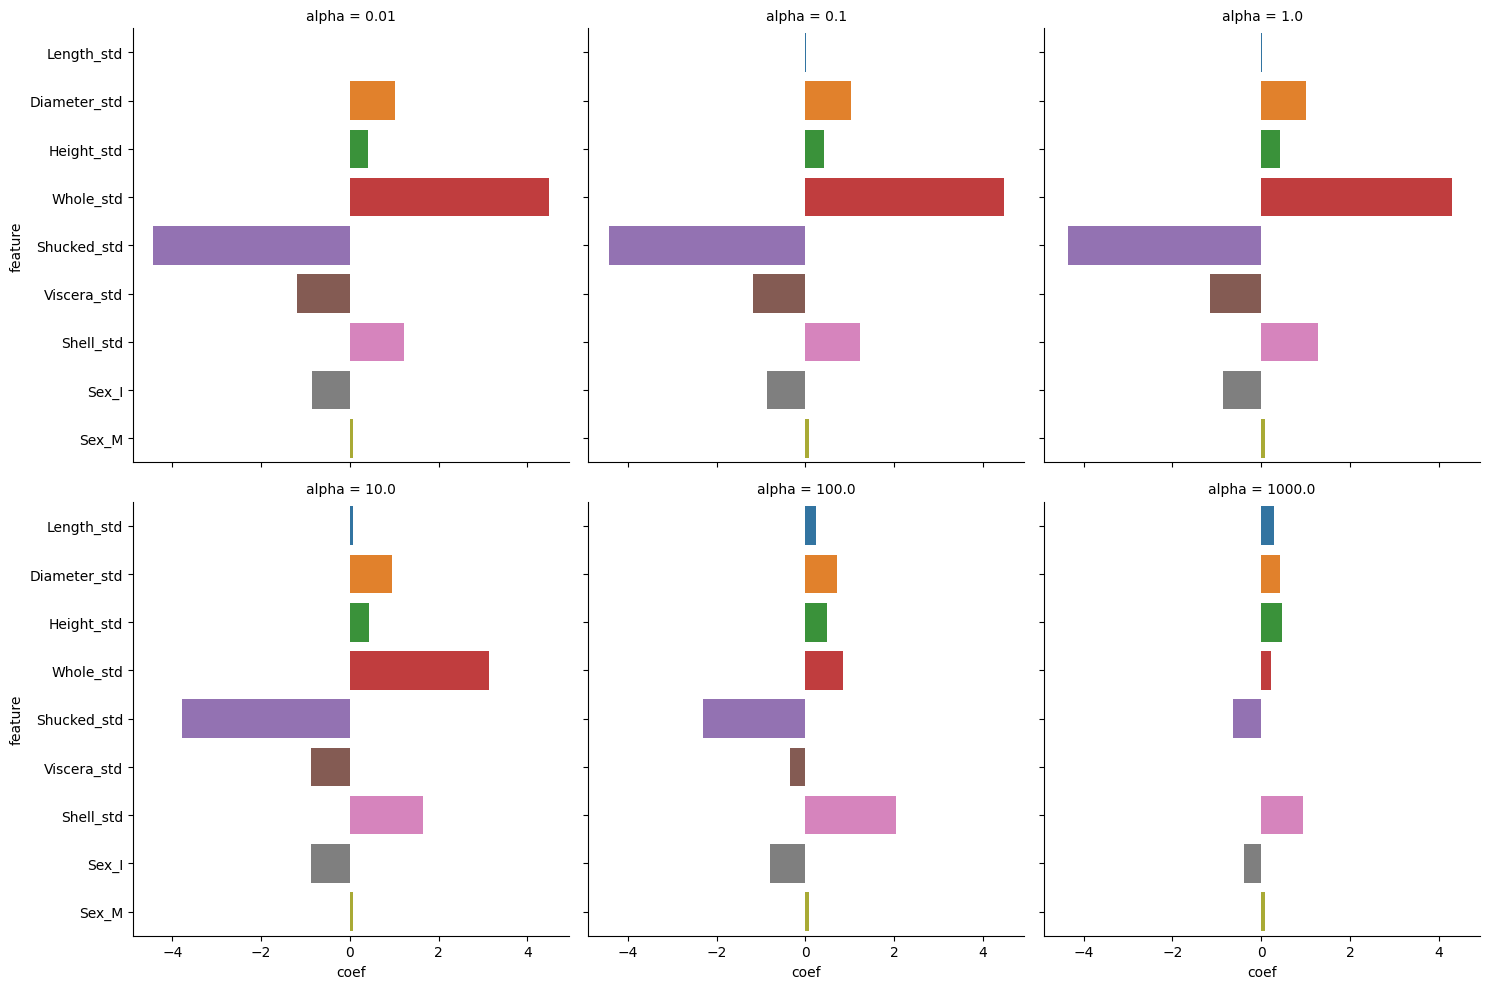

In [15]:
# 규제 계수별로 회귀 계수를 시각화합니다.
df_coef = pd.DataFrame(coefs, index=pd.Index(alphas, name='alpha'), columns=X_ct_name)\
        .reset_index().melt(id_vars='alpha', value_name='coef', var_name='feature')
sns.catplot(data=df_coef, y='feature', x='coef', col='alpha', col_wrap=3, kind='bar')
plt.show()

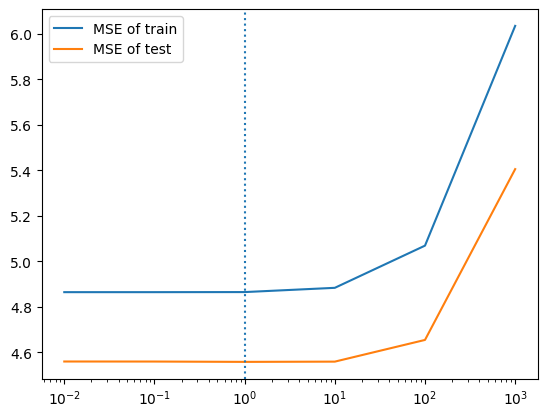

In [16]:
plt.gca().set(xscale='log')
sns.lineplot(x = alphas, y = mse_train, label='MSE of train')
sns.lineplot(x = alphas, y = mse_test, label='MSE of test')
plt.axvline(x = alphas[np.argmin(mse_test)], linestyle='dotted')
plt.legend()
plt.show()

**Lasso**

- L1 규제를 손실함수에 더한 선형 회귀 모델 입니다.

**sklearn.linear_model.Lasso**

- 손실 함수

> $L_{lasso}(y, \hat{y}) = \frac{1}{2n}||y - \hat{y}||^2_2 + \alpha ||\hat{\beta}||_1$

- 주요 하이퍼 파라메터

|하이퍼 파라메터|설명|
|----:|:----|
|alpha|규제 계수|

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.2]에서 Ridge 모델대신 Lasso 모델의 규제 계수(alpha)에 따라 df_train과 df_test에 대한 평균제곱오차(Mean Squared Error)를 비교해 봅니다.

```
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
```

</div>

In [17]:
from sklearn.linear_model import Lasso
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
coefs, mse_train, mse_test = list(), list(), list()
for alpha in alphas:
    reg_ls = make_pipeline(ct, Lasso(alpha=alpha, random_state=123))
    reg_ls.fit(df_abalone[X_cols], df_abalone['Rings'])
    coefs.append(reg_ls[1].coef_)
    mse_train.append(mean_squared_error(df_train['Rings'], reg_ls.predict(df_train[X_cols])))
    mse_test.append(mean_squared_error(df_test['Rings'], reg_ls.predict(df_test[X_cols])))
    
df_coef = pd.DataFrame(coefs, index=pd.Index(alphas, name='alpha'), columns=X_ct_name)\
        .reset_index().melt(id_vars='alpha', value_name='coef', var_name='feature')

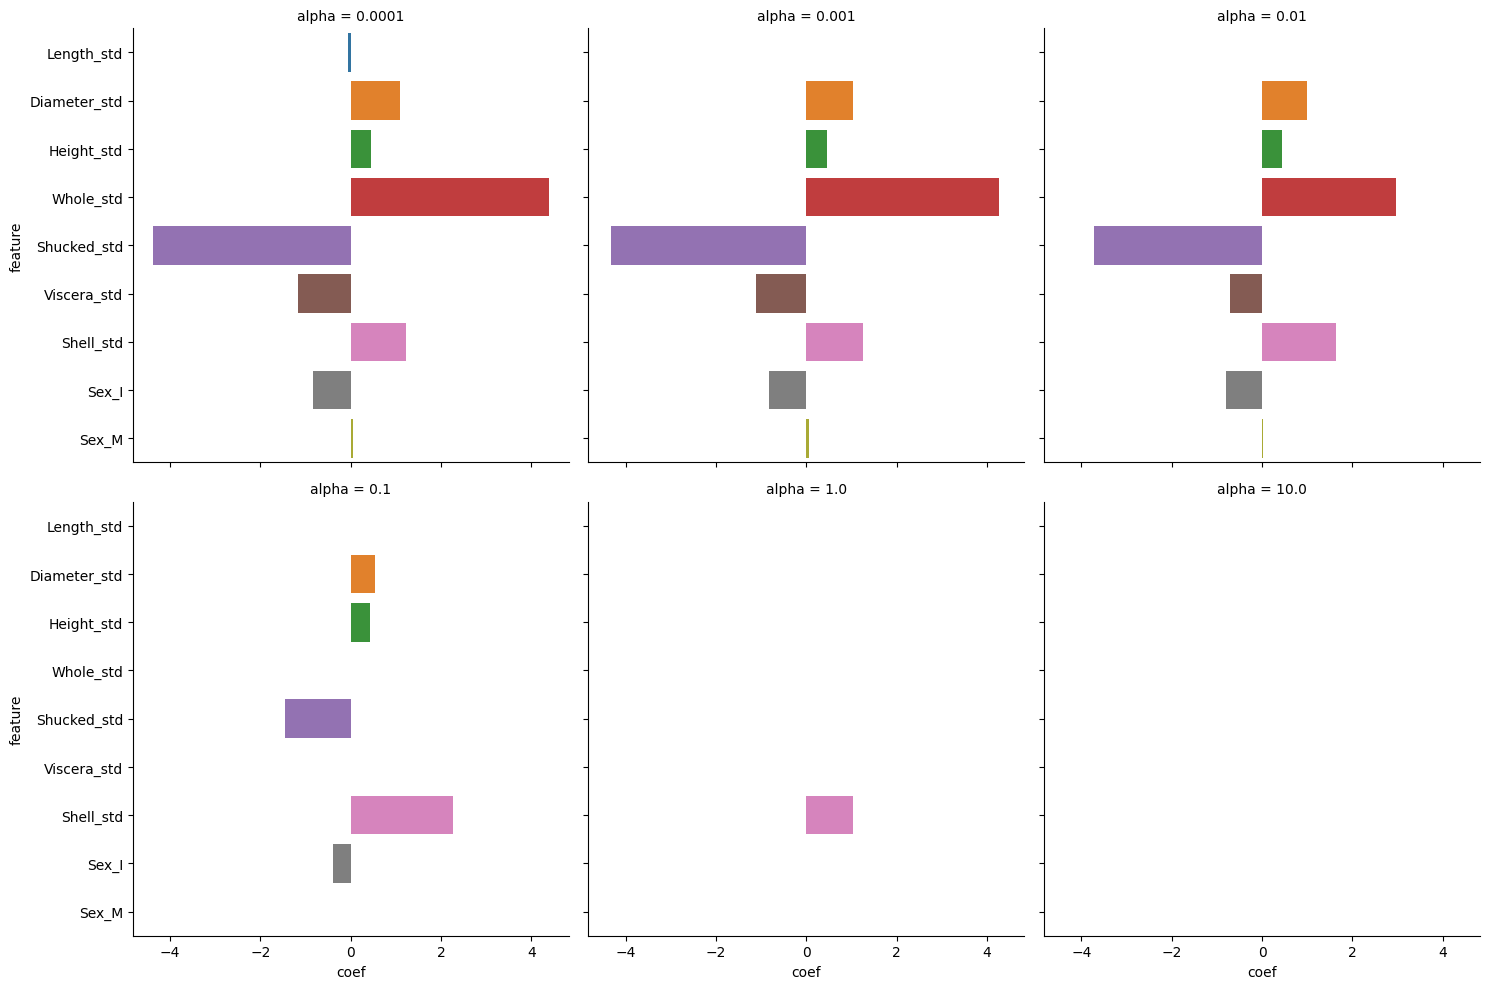

In [18]:
sns.catplot(data=df_coef, y='feature', x='coef', col='alpha', col_wrap=3, kind='bar')
plt.show()

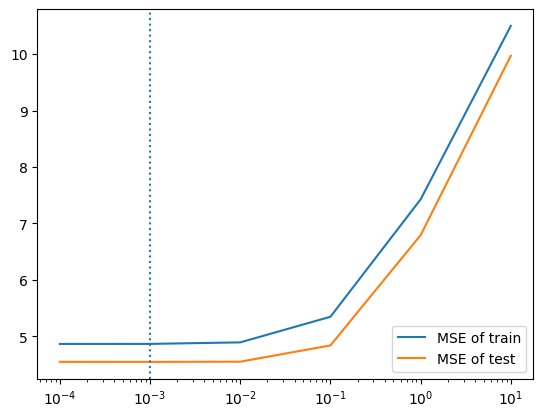

In [19]:
plt.gca().set(xscale='log')
sns.lineplot(x = alphas, y = mse_train, label='MSE of train')
sns.lineplot(x = alphas, y = mse_test, label='MSE of test')
plt.axvline(x = alphas[np.argmin(mse_test)], linestyle='dotted')
plt.legend()
plt.show()

**Elastic net**

- L1, L2 규제를 손실함수에 더한 선형 회귀 모델 입니다.

**sklearn.linear_model.ElasticNet**

- 손실 함수

> $L_{ElasticNet}(y, \hat{y}) = \frac{1}{2n}||y - \hat{y}||^2_2+ \rho \cdot \alpha \cdot ||\hat{\beta}||_1 + 0.5(1 - \rho) \cdot \alpha \cdot ||\hat{\beta}||_2$
>
> $\rho$: l1_ratio


- 주요 하이퍼 파라메터

|하이퍼 파라메터|설명|
|----:|:----|
|l1_ratio|l1 규제의 비율|

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.2]에서 Ridge 모델대신 Elastic net 모델의 규제 계수(alpha)에 따라 df_train과 df_test에 대한 평균제곱오차(Mean Squared Error)를 비교해 봅니다.

이 때, l1_ratio는 0.5로 설정합니다.

```
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
```
    
</div>

In [20]:
from sklearn.linear_model import ElasticNet
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
coefs, mse_train, mse_test = list(), list(), list()
for alpha in alphas:
    reg_ls = make_pipeline(ct, ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=123))
    reg_ls.fit(df_abalone[X_cols], df_abalone['Rings'])
    coefs.append(reg_ls[1].coef_)
    mse_train.append(mean_squared_error(df_train['Rings'], reg_ls.predict(df_train[X_cols])))
    mse_test.append(mean_squared_error(df_test['Rings'], reg_ls.predict(df_test[X_cols])))
    
df_coef = pd.DataFrame(coefs, index=pd.Index(alphas, name='alpha'), columns=X_ct_name)\
        .reset_index().melt(id_vars='alpha', value_name='coef', var_name='feature')

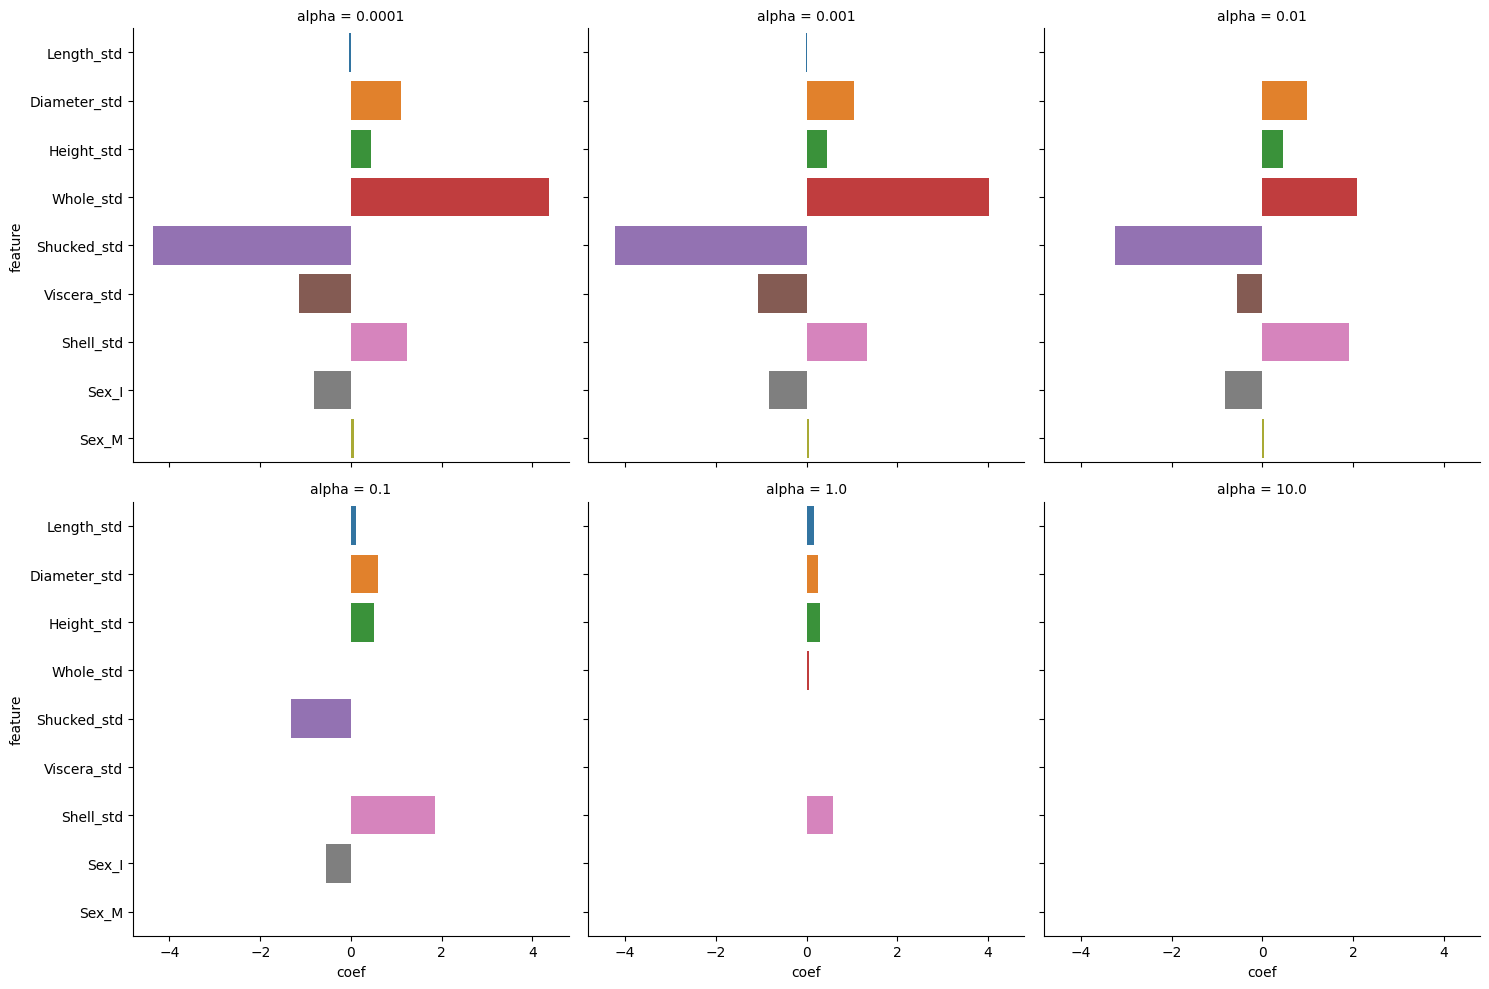

In [21]:
sns.catplot(data=df_coef, y='feature', x='coef', col='alpha', col_wrap=3, kind='bar')
plt.show()

**[Ex.6]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.5]를 기반으로 규제 계수(alpha)는 1로 고정하고, 아래 박스의 l1_ratios 들의 df_train과 df_test에 대한 평균제곱오차(Mean Squared Error)를 비교해 봅니다.


```
l1_ratios = [0.0, 0.2, 0.4, 0.6, 0.8, 1]
```
    
</div>

In [22]:
from sklearn.linear_model import ElasticNet
l1_ratios = [0.0, 0.2, 0.4, 0.6, 0.8, 1]
coefs, mse_train, mse_test = list(), list(), list()
alpha = 1
for l1_ratio in l1_ratios:
    reg_ls = make_pipeline(ct, ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
    reg_ls.fit(df_abalone[X_cols], df_abalone['Rings'])
    coefs.append(reg_ls[1].coef_)
    mse_train.append(mean_squared_error(df_train['Rings'], reg_ls.predict(df_train[X_cols])))
    mse_test.append(mean_squared_error(df_test['Rings'], reg_ls.predict(df_test[X_cols])))
    
df_coef = pd.DataFrame(coefs, index=pd.Index(l1_ratios, name='l1_ratio'), columns=X_ct_name)\
        .reset_index().melt(id_vars='l1_ratio', value_name='coef', var_name='feature')

c:\users\user\python3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15061.12194249252, tolerance: 4.341063059612166
  positive)


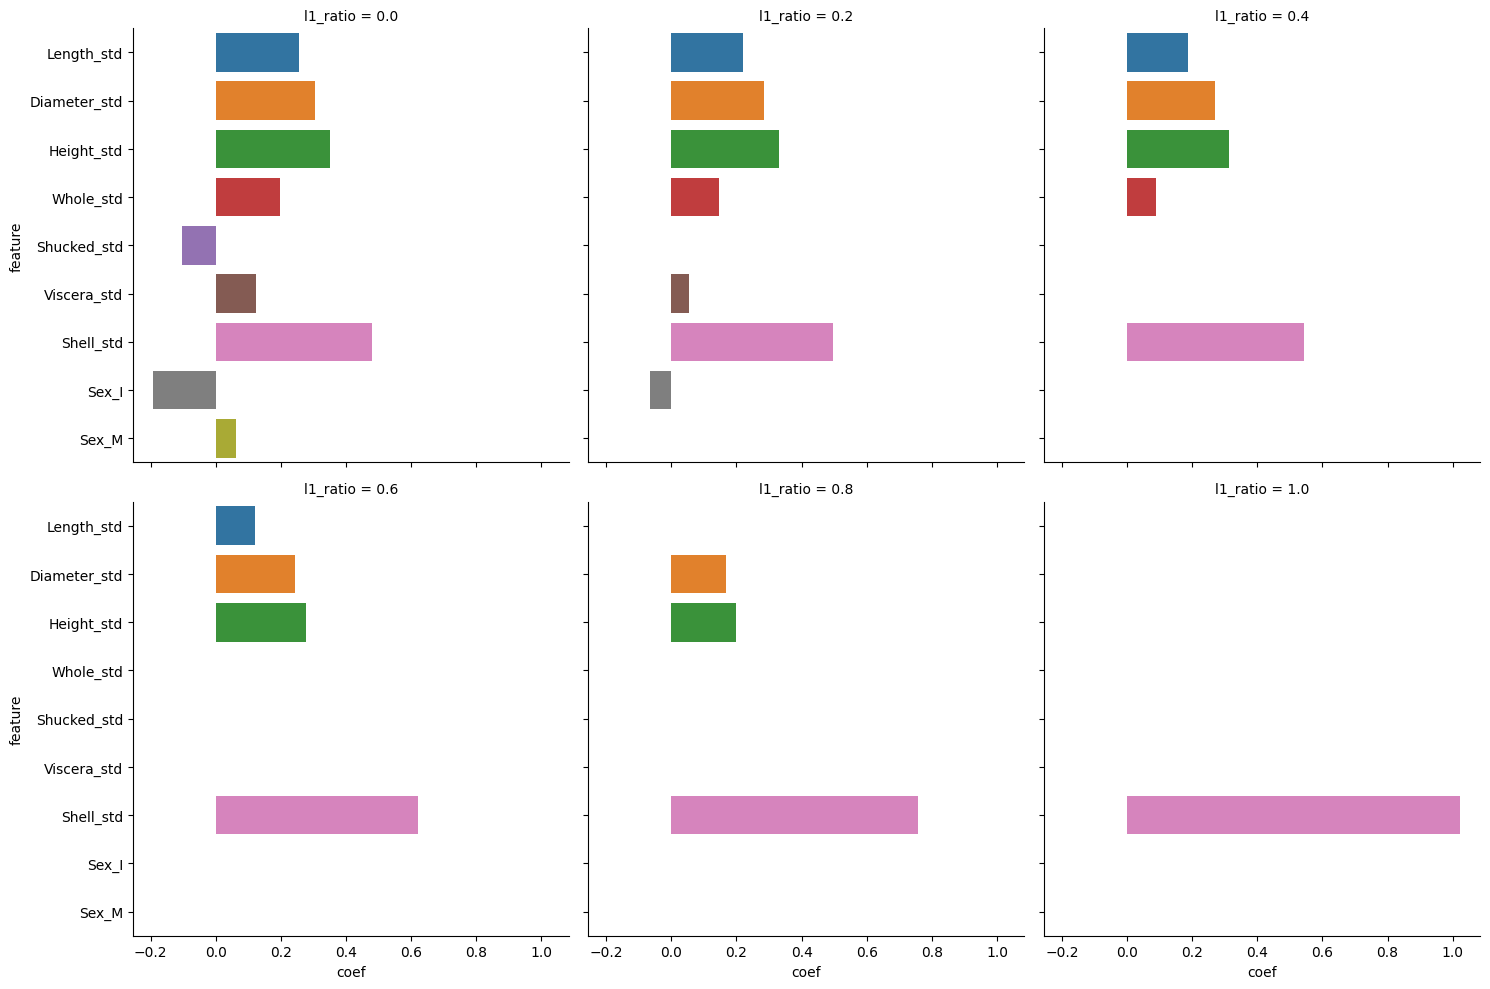

In [23]:
sns.catplot(data=df_coef, y='feature', x='coef', col='l1_ratio', col_wrap=3, kind='bar')
plt.show()

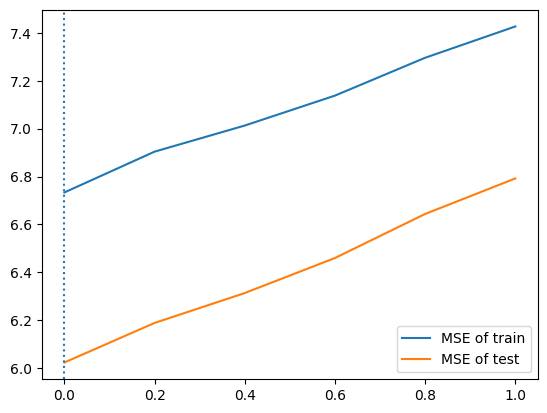

In [24]:
sns.lineplot(x = l1_ratios, y = mse_train, label='MSE of train')
sns.lineplot(x = l1_ratios, y = mse_test, label='MSE of test')
plt.axvline(x = alphas[np.argmin(mse_test)], linestyle='dotted')
plt.legend()
plt.show()

## 2. 로지스틱 회귀 모델(Logistic Regression Model)


### 이진 분류

- 링크 함수: 선형 회귀 모델의 출력의 스케일을 바꾸어주는 함수입니다.

> 선형회귀 모델의 출력은 $[-\infty, \infty]$이고 대상 변수의 영역은 [0, 1] 입니다.
>
> 만일 선형 회귀 모델을 분류 문제에 그대로 사용하게 한다면 출력이 음(Negative)의 클래스는 0을 중심으로 양(Positive)의 클래스는 1을 중심으로 출력이 모이도록 분포해야 합니다. $[-\infty, \infty]$를 범위로 하고 있어 구조상 최적의 해를 찾기 쉽지 않습니다.
>
> 선형회귀 모델이 음으로 갈수록 음(Negative)의 클래스 양수로 갈 수록 양(Positive) 클래스일 정도를 나타내게 하게 하도록 스케일을 변경시켜준다면, 최적의 해를 보다 찾기 쉬워지고 출력을 직관적으로 이해하기 쉽게 해줍니다. 


- 로짓(Logit) 함수: 확률의 영역 $[0, 1]$의 수를 $[-\infty, \infty]$ 으로 바꾸어 주는 함수 입니다.

> $odd(\hat{y}) = \frac{\hat{y}}{1-\hat{y}}$ : $[0, 1]$의 수를 $[0, \infty]$로 바꾸어 줍니다.
>
> $logit(\hat{y}) = log(\frac{\hat{y}}{1-\hat{y}})$: $[0, 1]$의 수를 $[-\infty, \infty]$로 바꾸어 줍니다.

- 로지스틱(Logistic) 함수: $[-\infty, \infty]$의 수를 $[0, 1]$의 수로 바꾸어 줍니다. Logit의 역함수입니다.

> $x = log(\frac{\hat{y}}{1-\hat{y}})$
>
> $e^x = \frac{\hat{y}}{1-\hat{y}}$
>
> $(1-\hat{y})e^x = \hat{y}$
>
> $(1 + e^x)\hat{y} = e^x$
>
> $\hat{y} = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}$

- 선형회귀 모델에서 링크 함수로 로지스틱(Logistic) 함수를 사용하는 선형 회귀 모델을 **로지스틱 회귀 모델**이라 합니다.


- 이진 크로스 엔트로피(Binary Cross Entropy): 이진 분류의 손실 함수입니다.

> $L_{Logistic}(y, \hat{y}) = -\left(ylog(\hat{y}) + (1 - y)log(1 - \hat{y})\right)$

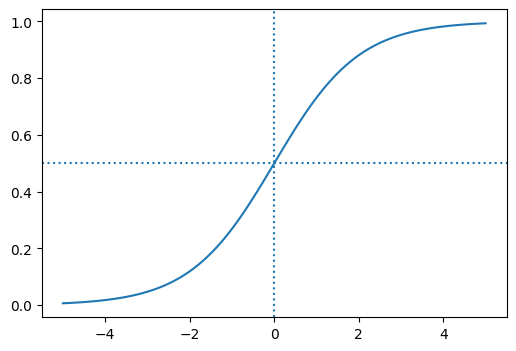

In [25]:
from scipy.special import expit

plt.figure(figsize=(6, 4))
x = np.linspace(-5, 5, 101)
plt.plot(x, expit(x))
plt.axvline(0, linestyle='dotted')
plt.axhline(0.5, linestyle='dotted')
plt.show()

### 다중 클래스 분류

- Softmax 함수: 다중 클래스 분류의 문제에서 클래스 수만큼의 로짓(Logit)에서 확률로 변환해주는 함수입니다.

> $softmax(p) = \frac{e^{p_i}}{\sum_{i=1}^ce^{p_i}}$, $c$: 클래스의 수 

- 크로스 엔트로피(Cross Entropy): 다중 분류의 손실 함수입니다.

> $L_{Logistic}(y, \hat{y}) = -\sum_{i=1}^cy_ilog(\hat{y_i})$, 
>
> $y_i$: 대상 변수 y가 i 클래스 여부를 나타내는 벡터, $\hat{y_i}$: i 클래스일 확률 예측을 나타내는 벡터

**sklearn.linear_model.LogisticRegression**

$L(y, \hat{y}) = C \sum_{i=1}^n s_i \left(-y_i \log(\hat{y_i}) - (1 - y_i) \log(1 - \hat{y_i})\right) + r(\hat{\beta})$

|penalty|r(w)|
|---:|:---|
|None|0|
|$l_1$|$$||\hat{\beta}||_1$$|
|$l_2$|$$\frac{1}{2}||\hat{\beta}||_2$$|
|ElasticNet|$$\frac{1-\rho}{2}||\hat{\beta}||_2 + \rho||\hat{\beta}||_1$$|

- 주요 하이퍼 파라메터

|하이퍼 파라메터|설명|
|---:|:----|
|penalty|None, l1, l2, ElasticNet|
|C|규제 강도의 역수(Inverse of regularization Strength), **C**apacity|
|multi_class|'auto', 'ovr', 'multinomial' <br/> **ovr**: One vs Rest <br/> **multinomial**: Softmax를 Loss로 합니다. |



**[Ex.7]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_train가 df_test에서 성별(Sex)이 'F', 'M' 인 경우만 뽑아 df_train2, df_test2셋을 만들어, 

성별(Sex)을 맞추는 로지스틱 회귀 모델을 만들어 df_train2로 학습을 시키고,

df_test2로 성능을 측정합니다. 

성능 측정은 AUC(Area under of receiver characteristic Curve)로 합니다.
    
</div>

In [26]:
df_train2 = df_train.loc[df_train['Sex'].isin(['F', 'M'])]
df_test2 = df_test.loc[df_test['Sex'].isin(['F', 'M'])]

X_cols = [i for i in df_train2.columns if i != 'Sex']
X_cols

['Length',
 'Diameter',
 'Height',
 'Whole',
 'Shucked',
 'Viscera',
 'Shell',
 'Rings']

In [28]:
from sklearn.linear_model import LogisticRegression
clf_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(random_state=123, solver='lbfgs')
)
clf_lr.fit(df_train2[X_cols], df_train2['Sex'])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [29]:
from sklearn.metrics import roc_auc_score

(
    roc_auc_score(df_train2['Sex'], clf_lr.predict_proba(df_train2[X_cols])[:, 1]),
    roc_auc_score(df_test2['Sex'], clf_lr.predict_proba(df_test2[X_cols])[:, 1])
)

(0.5866224253815038, 0.558851397589093)

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

C에 따라서 df_train2, df_test2의 성능의 변화 정도를 확인해 봅니다.

```
C = [1e-2, 1e-1, 1, 1e1, 1e2]
```
    
</div>

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
params = [1e-2, 1e-1, 1, 1e1, 1e2]

roc_train, roc_test = list(), list()
for param in params:
    clf_lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(C=param, random_state=123, solver='lbfgs')
    )
    clf_lr.fit(df_train2[X_cols], df_train2['Sex'])
    roc_train.append(roc_auc_score(df_train2['Sex'], clf_lr.predict_proba(df_train2[X_cols])[:, 1]))
    roc_test.append(roc_auc_score(df_test2['Sex'], clf_lr.predict_proba(df_test2[X_cols])[:, 1]))

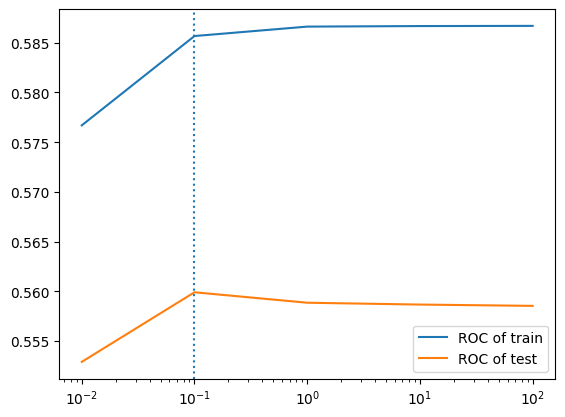

In [31]:
plt.gca().set(xscale='log')
sns.lineplot(x = params, y = roc_train, label='ROC of train')
sns.lineplot(x = params, y = roc_test, label='ROC of test')
plt.axvline(x = params[np.argmax(roc_test)], linestyle='dotted')
plt.legend()
plt.show()

이진 분류일 때, sklearn.linear_model.LogisticRegression의 decision_function은 Logit을 반환합니다.

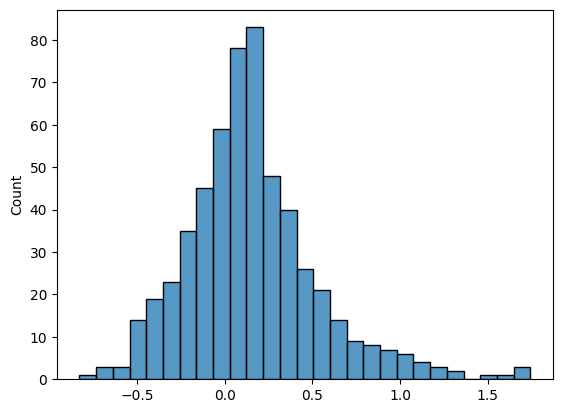

In [32]:
sns.histplot(
    clf_lr.decision_function(df_test2[X_cols])
)
plt.show()

Logit을 Logistic 함수에 전달하면 Positive Class일 확률이 나오게 됩니다.

> $\hat{y} = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}$

In [33]:
from scipy.special import expit

#expit(clf_lr.decision_function(df_test2[X_cols]))
1 / (1 + np.exp(-clf_lr.decision_function(df_test2[X_cols])))[:5]

array([0.73800659, 0.62081834, 0.45495903, 0.46829104, 0.53452528])

In [34]:
clf_lr.predict_proba(df_test2[X_cols])[:5, 1]

array([0.73800659, 0.62081834, 0.45495903, 0.46829104, 0.53452528])

Positive Class일 확률을 가지고 Logit을 만들어 봅니다.

$logit(\hat{y}) = log(\frac{\hat{y}}{1-\hat{y}})$

In [35]:
from scipy.special import logit

#logit(clf_lr.predict_proba(df_test2[X_cols])[:, 1])
np.log(clf_lr.predict_proba(df_test2[X_cols])[:, 1] / clf_lr.predict_proba(df_test2[X_cols])[:, 0])[:5]

array([ 1.03563338,  0.49302312, -0.18065359, -0.12700628,  0.13832123])

In [36]:
clf_lr.decision_function(df_test2[X_cols])[:5]

array([ 1.03563338,  0.49302312, -0.18065359, -0.12700628,  0.13832123])

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

성별(Sex)을 맞추는 로지스틱 회귀 모델을 만들어 df_train로 학습을 시키고,

이 때, 입력 변수들을 표준화합니다.
    
multi_class가 'ovr'(One vs Rest) 일때와 multi_class가 'multinomial'의 작업의 의미를 살펴봅니다.
    
</div>

In [37]:
clf_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=123, solver='lbfgs', multi_class='ovr')
)
clf_lr.fit(df_train[X_cols], df_train['Sex'])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [38]:
X_test_std = clf_lr[0].transform(df_test[X_cols])

In [39]:
clf_lr[1].coef_, clf_lr[1].intercept_

(array([[-0.01289247,  1.0203668 ,  0.23410588,  0.15956636, -0.7117244 ,
          0.39013469, -0.23430952,  0.1573919 ],
        [ 1.8503066 , -0.7713847 , -0.2266418 , -1.74907003,  0.15134294,
         -1.48124379,  0.304532  , -0.66902424],
        [-0.20892971,  0.3043963 ,  0.03182928, -0.1664884 ,  0.58584343,
          0.083093  , -0.21802962,  0.26162426]]),
 array([-0.93339435, -1.59994996, -0.6009166 ]))

multi_class를 ovr로 할 경우에는 'F', 'I', 'M' 클래스를 차례대로 Positive Class로 만들어 로지스틱 회귀모델 이진 분류 3개를 만듭니다.

그리고 Positive 확률(또는 Logit)이 가장 큰 클래스로 예측합니다.

In [40]:
clf_lr_sub = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=123, solver='lbfgs', multi_class='ovr')
)
for i in ['F', 'I', 'M']:
    clf_lr_sub.fit(df_train[X_cols], df_train['Sex'] == i)
    print(i, clf_lr_sub[1].coef_, clf_lr_sub[1].intercept_)

F [[-0.01289247  1.0203668   0.23410588  0.15956636 -0.7117244   0.39013469
  -0.23430952  0.1573919 ]] [-0.93339435]
I [[ 1.8503066  -0.7713847  -0.2266418  -1.74907003  0.15134294 -1.48124379
   0.304532   -0.66902424]] [-1.59994996]
M [[-0.20892971  0.3043963   0.03182928 -0.1664884   0.58584343  0.083093
  -0.21802962  0.26162426]] [-0.6009166]


multi_class를 multinomial일 경우에는 Softmax로 손실(크로스 엔트로피)을 계산하는 로지스틱 회귀 모델을 만듭니다.

> $softmax(p) = \frac{e^{p_i}}{\sum_{i=1}^ce^{p_i}}$, $c$: 클래스의 수 
>
> $L_{Logistic}(y, \hat{y}) = -\sum_{i=1}^cy_ilog(\hat{y_i})$, $c$: 클래스의 수, $y_i$: y 벡터가 i 클래스 여부를 나타내는 벡터, $\hat{y_i}$: i 클래스 가능성능 나타내는 예측 

In [41]:
clf_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=123, solver='lbfgs', multi_class='multinomial')
)
clf_lr.fit(df_train[X_cols], df_train['Sex'])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [42]:
clf_lr[1].coef_, clf_lr[1].intercept_

(array([[-0.55597341,  0.57213952,  0.14144636,  0.73018788, -0.46457491,
          0.5751959 , -0.175952  ,  0.21029227],
        [ 1.25691352, -0.61626288, -0.16678387, -1.30535756,  0.21177478,
         -0.97403424,  0.29214273, -0.44814125],
        [-0.70094011,  0.04412336,  0.02533751,  0.57516967,  0.25280013,
          0.39883834, -0.11619073,  0.23784898]]),
 array([ 0.15546789, -0.58741748,  0.43194959]))

#### one-vs-rest(OVR)과 multinomial 비교

- OVR에서는 각 평면들이 교차하는 영역에서의 부정확한 경계가 만들어질 수 있고, 이러한 문제는 클래스의 분포가 불균형할 때 심하게 나타납니다.


- 반면, OVR은 multinomial에 비해 직관적이며 해석이 용이합니다.

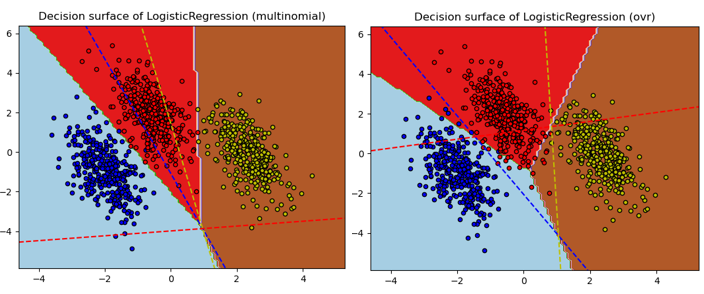

※ 이미지 출처: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

## 선형 모델의 장단점

### 장점

- 계산 효율성


- 해석이 용이


- 이해하기 쉬운 개념

### 단점

- 대상 변수와 입력 변수간의 선형성을 지녀야 성능을 발휘

> 성능 향상을 위한 많은 속성 엔지니어링이 필요합니다.

- 이상치에 민감